## lw

Developent of mse

$\frac{1}{2} \hat{\frac{\delta {h ^ \prime} ^2}{\delta t}} = \hat{h^ \prime} \ \textcolor{lightblue}{\text{NetLW}} + \hat{h^ \prime} \ \text{SEF} + \hat{h^ \prime} \ \text{NetSW} - \hat{h^ \prime} \ \nabla_{h}\cdot \hat{\overrightarrow{u}h}$

$\textcolor{lightblue}{\text{NetLW}} = \textcolor{lightblue}{\text{rlus}} - \textcolor{lightblue}{\text{rlds}} - \textcolor{lightblue}{\text{rlut}}$

In [2]:
import xarray as xr

import numpy as np
import skimage.measure as skm

import matplotlib.pyplot as plt
%matplotlib inline
import cartopy.crs as ccrs
import cartopy.feature as cfeat

import os

import warnings
from shapely.errors import ShapelyDeprecationWarning
warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning) 

In [3]:
model='MPI-ESM1-2-HR'
experiment_id='historical'
folder = '/Users/cbla0002/Documents/data/cmip6/' + model

In [4]:
fileName = model + '_lw_' + experiment_id + '.nc'
path = folder + '/' + fileName
ds = xr.open_dataset(path)

In [5]:
ds

<xarray.Dataset>
Dimensions:   (lat: 64, lon: 384, time: 4)
Coordinates:
  * lat       (lat) float64 -29.45 -28.52 -27.58 -26.65 ... 27.58 28.52 29.45
  * lon       (lon) float64 0.0 0.9375 1.875 2.812 ... 356.2 357.2 358.1 359.1
  * time      (time) datetime64[ns] 1970-01-01 1970-01-02 1970-01-03 1970-01-04
Data variables:
    rlut_day  (time, lat, lon) float32 ...
    rlds_day  (time, lat, lon) float32 ...
    rlus_day  (time, lat, lon) float32 ...

In [6]:
ds.rlut_day

<xarray.DataArray 'rlut_day' (time: 4, lat: 64, lon: 384)>
array([[[284.4006 , 284.2263 , ..., 285.81564, 283.94016],
        [285.2385 , 286.77853, ..., 285.33273, 284.67014],
        ...,
        [222.63547, 207.57443, ..., 204.93088, 222.36838],
        [213.63107, 215.28098, ..., 188.78781, 204.82736]],

       [[286.05145, 285.58417, ..., 286.78485, 283.67938],
        [286.78534, 288.48358, ..., 286.3542 , 287.30878],
        ...,
        [233.39667, 229.28192, ..., 254.05682, 247.37567],
        [242.81268, 229.09296, ..., 250.05829, 251.08954]],

       [[291.14053, 290.36417, ..., 292.21426, 292.27188],
        [292.83292, 290.5424 , ..., 289.9916 , 290.56192],
        ...,
        [270.33633, 278.03116, ..., 251.57315, 262.06534],
        [255.94376, 264.246  , ..., 229.49649, 243.7875 ]],

       [[287.65027, 287.29138, ..., 291.60437, 289.77185],
        [289.0287 , 289.09314, ..., 288.5204 , 288.94714],
        ...,
        [273.9579 , 274.1869 , ..., 278.72595, 277.48132],
        [270.53748, 267.6776 , ..., 274.17566, 272.43152]]], dtype=float32)
Coordinates:
  * lat      (lat) float64 -29.45 -28.52 -27.58 -26.65 ... 27.58 28.52 29.45
  * lon      (lon) float64 0.0 0.9375 1.875 2.812 ... 356.2 357.2 358.1 359.1
  * time     (time) datetime64[ns] 1970-01-01 1970-01-02 1970-01-03 1970-01-04
Attributes:
    standard_name:  toa_outgoing_longwave_flux
    long_name:      TOA Outgoing Longwave Radiation
    comment:        at the top of the atmosphere (to be compared with satelli...
    units:          W m-2
    cell_methods:   area: time: mean
    cell_measures:  area: areacella
    history:        2019-08-25T06:42:10Z altered by CMOR: Changed sign. 2019-...

In [7]:
def plot_snapshot(var, cmap, variable_name, model):
    projection = ccrs.PlateCarree(central_longitude=180)
    lat = var.lat
    lon = var.lon

    f, ax = plt.subplots(subplot_kw=dict(projection=projection), figsize=(15, 5))

    var.plot(transform=ccrs.PlateCarree(), cbar_kwargs={'orientation': 'horizontal','pad':0.125, 'aspect':50,'fraction':0.055}, cmap=cmap)
    ax.add_feature(cfeat.COASTLINE)
    ax.set_extent([lon[0], lon[-1], lat[0], lat[-1]], crs=ccrs.PlateCarree())
    ax.set_title(variable_name + ' snapshot, model:' + model)
    ax.set_xticks([-180, -90, 0, 90, 180])
    ax.set_xticklabels([0, 90, 180, 270, 360])
    ax.set_yticks([-20, 0, 20])
    plt.tight_layout()

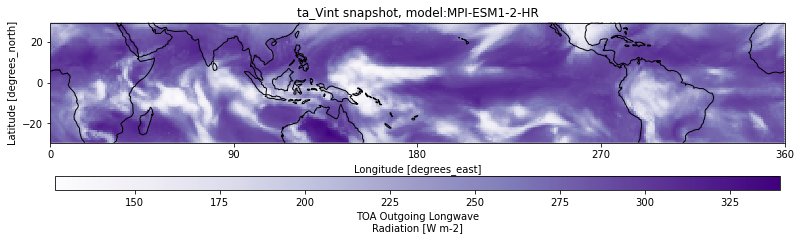

In [8]:
plot_snapshot(ds.rlut_day.isel(time=0), 'Purples', 'ta_Vint', model)

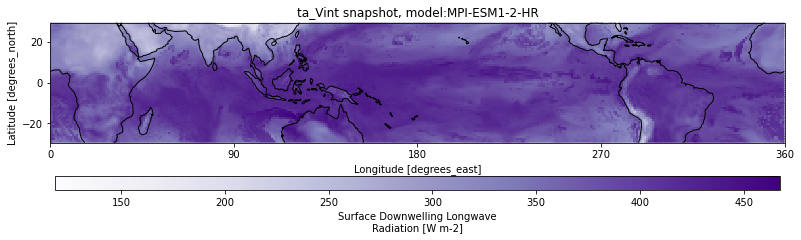

In [9]:
plot_snapshot(ds.rlds_day.isel(time=0), 'Purples', 'ta_Vint', model)

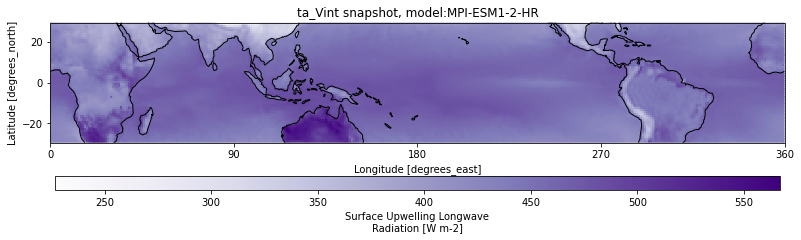

In [10]:
plot_snapshot(ds.rlus_day.isel(time=0), 'Purples', 'ta_Vint', model)

In [11]:
netlw = ds.rlus_day.isel(time=0) - ds.rlds_day.isel(time=0) - ds.rlut_day.isel(time=0)

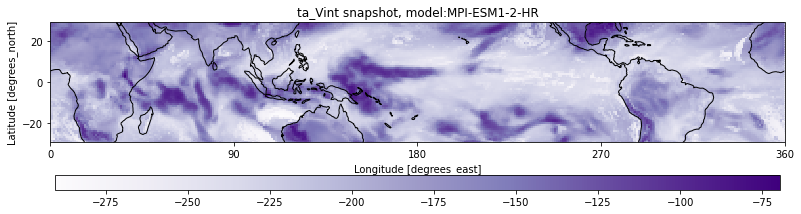

In [12]:
plot_snapshot(netlw, 'Purples', 'ta_Vint', model)